1.Import Libraries & Load Data

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset from pickle file
df = pd.read_pickle("../processed data/hotel_bookings_cleaned.pkl")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,has_agent
0,Resort Hotel,0,315,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,True
1,Resort Hotel,0,315,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,True
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,True
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,True
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,True


2.Probability of Cancellation by Room Type

In [12]:
room_cancel_prob = df.groupby('reserved_room_type')['is_canceled'].mean()
print("P(Cancel | Room Type):\n", room_cancel_prob)


P(Cancel | Room Type):
 reserved_room_type
A    0.259735
B    0.318318
C    0.323497
D    0.300954
E    0.272652
F    0.301452
G    0.359162
H    0.407718
L    0.333333
P    1.000000
Name: is_canceled, dtype: float64


3. Probability: P(Cancel | Month / Season)

P(Cancel | Month):
 arrival_date_month
January      0.221180
February     0.232081
March        0.243578
April        0.304628
May          0.292315
June         0.303155
July         0.318019
August       0.321844
September    0.245478
October      0.236804
November     0.211096
December     0.268616
Name: is_canceled, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_38844\33363316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_cancel_prob.index, y=month_cancel_prob.values, palette='coolwarm')


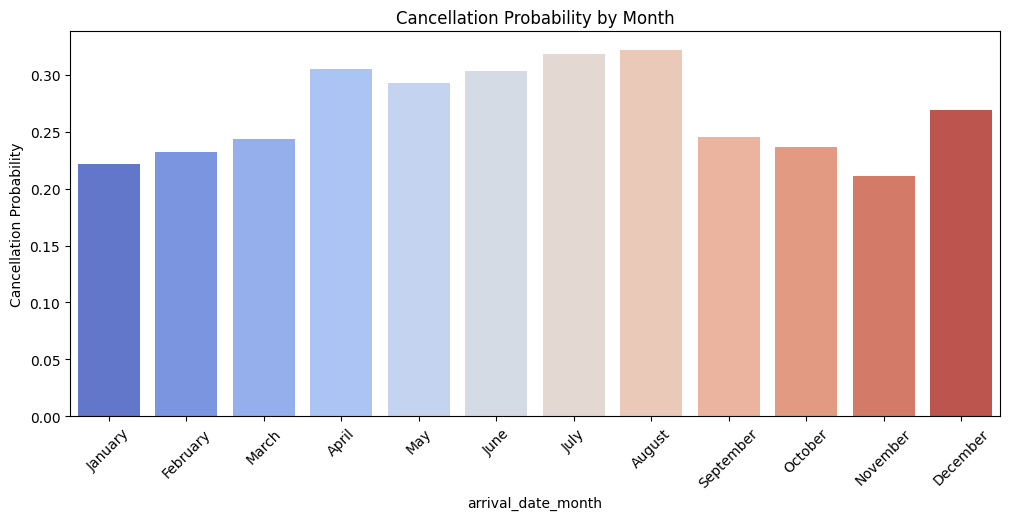

In [13]:
month_cancel_prob = df.groupby('arrival_date_month')['is_canceled'].mean()
month_order = ['January','February','March','April','May','June','July','August',
               'September','October','November','December']
month_cancel_prob = month_cancel_prob.reindex(month_order)

# Display table
print("P(Cancel | Month):\n", month_cancel_prob)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=month_cancel_prob.index, y=month_cancel_prob.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("Cancellation Probability")
plt.title("Cancellation Probability by Month")
plt.show()
